# K Means Clustering

Centroid(center) based clustering algorithm

# Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#scikit-learn packages
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Dataset

Dataset from https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [3]:
# importing the dataset

df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe() # to know mean, std and count

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Rename the columns

In [5]:
df.rename(
    columns={
        "Annual Income (k$)": "Annual_Income",
        "Spending Score (1-100)": "Spending_Score"
    },
    inplace=True
)

df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Check for null values into our csv
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual_Income,0
Spending_Score,0


# Scatter Plot

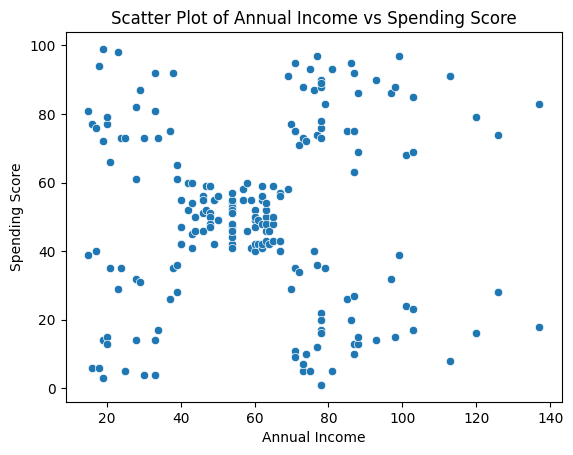

In [7]:
sns.scatterplot(
    x="Annual_Income",
    y="Spending_Score",
    data=df
)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Scatter Plot of Annual Income vs Spending Score")
plt.show()

# Data Preparation & Feature Scaling

In [9]:
X = df[["Annual_Income", "Spending_Score"]]
X.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

# Chosing the optimum number of clusters

In [11]:
#WCSS -> Within Cluster Sum of Squares
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++")
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

wcss

[23.040720326039906,
 13.993505283127979,
 9.058985215159455,
 6.110312266413655,
 3.583117905952559,
 3.1023925778612864,
 2.7023162197621042,
 2.3510599354472137,
 2.0164776873574386,
 1.6862184815254289]

# Elbow Method GRAPH

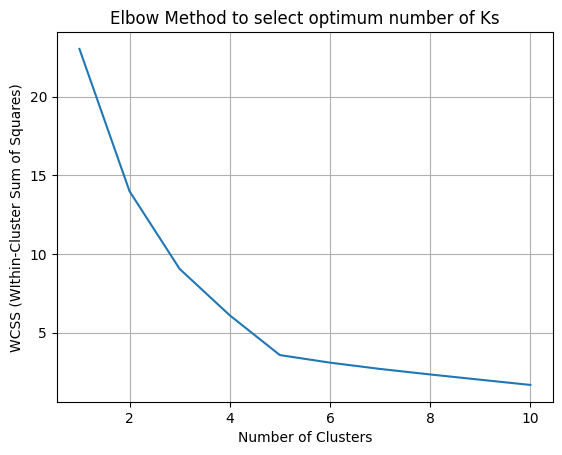

In [12]:
plt.grid()
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (WIthin-Cluster Sum of Squares)")
plt.title("Elbow Method to select optimum number of Ks")
plt.show()



# Model Building

In [26]:
k_means = KMeans(n_clusters=5, init="k-means++", random_state=2)
predicted_label = k_means.fit_predict(X_scaled)
predicted_label

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [27]:
# Optional, checking which scaled points belong to cluster 0

X_scaled[predicted_label == 0,0]

array([0.19672131, 0.20491803, 0.20491803, 0.20491803, 0.20491803,
       0.22131148, 0.22131148, 0.2295082 , 0.2295082 , 0.2295082 ,
       0.2295082 , 0.23770492, 0.23770492, 0.25409836, 0.25409836,
       0.25409836, 0.25409836, 0.26229508, 0.26229508, 0.2704918 ,
       0.2704918 , 0.2704918 , 0.2704918 , 0.2704918 , 0.2704918 ,
       0.27868852, 0.27868852, 0.28688525, 0.28688525, 0.31967213,
       0.31967213, 0.31967213, 0.31967213, 0.31967213, 0.31967213,
       0.31967213, 0.31967213, 0.31967213, 0.31967213, 0.31967213,
       0.31967213, 0.3442623 , 0.3442623 , 0.35245902, 0.35245902,
       0.36065574, 0.36065574, 0.36885246, 0.36885246, 0.36885246,
       0.36885246, 0.36885246, 0.36885246, 0.37704918, 0.37704918,
       0.3852459 , 0.3852459 , 0.3852459 , 0.3852459 , 0.3852459 ,
       0.3852459 , 0.39344262, 0.39344262, 0.39344262, 0.39344262,
       0.39344262, 0.39344262, 0.40163934, 0.40163934, 0.40983607,
       0.40983607, 0.40983607, 0.40983607, 0.42622951, 0.42622

# ScatterPlot Chart

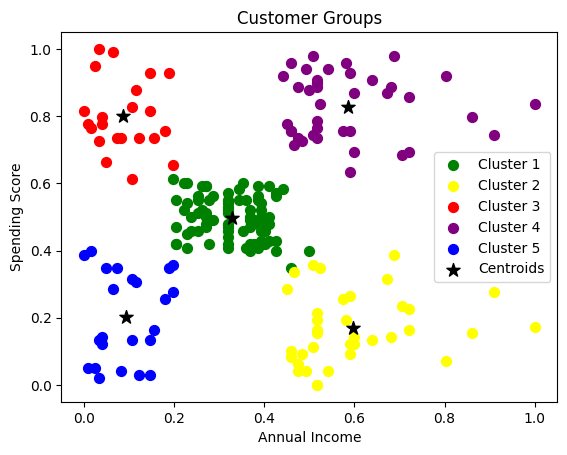

In [28]:
plt.scatter(X_scaled[predicted_label == 0,0], X_scaled[predicted_label== 0,1], s=50, c="green", label="Cluster 1")
plt.scatter(X_scaled[predicted_label == 1,0], X_scaled[predicted_label== 1,1], s=50, c="yellow", label="Cluster 2")
plt.scatter(X_scaled[predicted_label == 2,0], X_scaled[predicted_label== 2,1], s=50, c="red", label="Cluster 3")
plt.scatter(X_scaled[predicted_label == 3,0], X_scaled[predicted_label== 3,1], s=50, c="purple", label="Cluster 4")
plt.scatter(X_scaled[predicted_label == 4,0], X_scaled[predicted_label== 4,1], s=50, c="blue", label="Cluster 5")
plt.scatter(k_means.cluster_centers_ [:,0], k_means.cluster_centers_ [:,1], s=100, c="black", marker="*", label="Centroids")
k_means
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# Silhouette Score Chart

In [29]:
from sklearn.metrics import silhouette_score

#Evaluate cluster quality using the Silhouette Score

silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  score = silhouette_score(X_scaled, kmeans.labels_)
  silhouette_scores.append(score)

silhouette_scores

[np.float64(0.3447138642257591),
 np.float64(0.4498539603795658),
 np.float64(0.4971506623868143),
 np.float64(0.5593469429051445),
 np.float64(0.5244046259750482),
 np.float64(0.48083628842905113),
 np.float64(0.47423530152553683),
 np.float64(0.4332042575649034),
 np.float64(0.44833378088523645)]

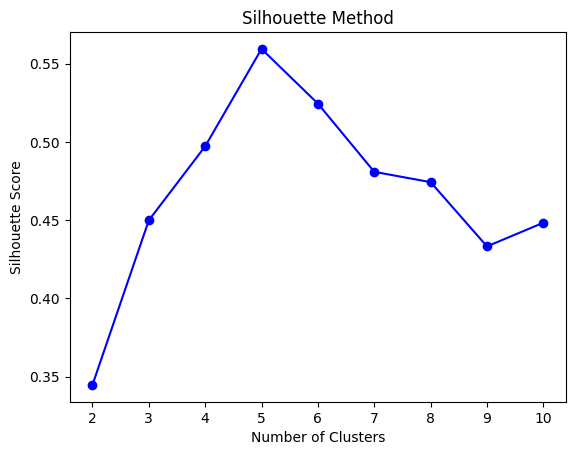

In [30]:
#Creating the plots

plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()